# Import libraries

In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.3)

# Read file by using Pandas

In [2]:
df=pd.read_csv('117 01Students.csv')
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 544.0 bytes


In [4]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


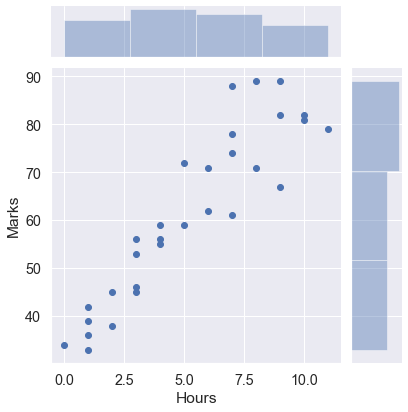

In [5]:
sns.jointplot(x='Hours',y='Marks',data=df)

In [6]:
x=df['Hours'].values.reshape(-1,1)
y=df['Marks']

In [7]:
x

array([[ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10],
       [11]], dtype=int64)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
x_test.shape

(9, 1)

### Train model

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Test model

In [11]:
y_pred=model.predict(x_test)
y_pred

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [12]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

## calculate R2 score

In [13]:
model.score(x_train,y_train)

0.8111744903394345

In [14]:
model.score(x_test,y_test)

0.8538655334937388

## calculate Root mean square error

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(y_test,y_pred)

31.922262350145488

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.649978969000282

### Test model on custom data

In [18]:
model.predict([[0]])

array([34.87037882])

### model Parameters

In [19]:
model.coef_

array([5.01757188])

In [20]:
model.intercept_

34.87037882245549

## visualize model

In [21]:
import matplotlib.pyplot as plt

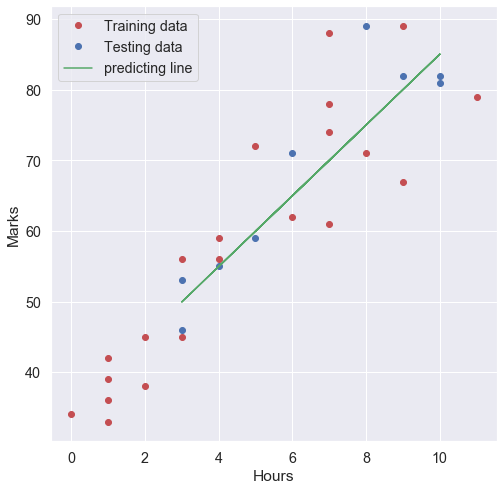

In [28]:
plt.plot(x_train,y_train,'ro',label='Training data')
plt.plot(x_test,y_test,'bo',label='Testing data')
plt.plot(x_test,y_pred,'g',label='predicting line')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
